In [1]:
from typing import Set


from solver import BTSPSolverSAT
from util import random_points, draw_edges, export_instance, import_instance, suppress_stdout

In [2]:
%load_ext autoreload
%autoreload 2

New best bottleneck: 6614.749126006216!
The bottleneck 4988.487746802632 is infeasible!
New best bottleneck: 5325.579498984124!
The bottleneck 5272.654359997438 is infeasible!
The bottleneck 5280.050946723904 is infeasible!
Time taken: 0.0014466140000002348


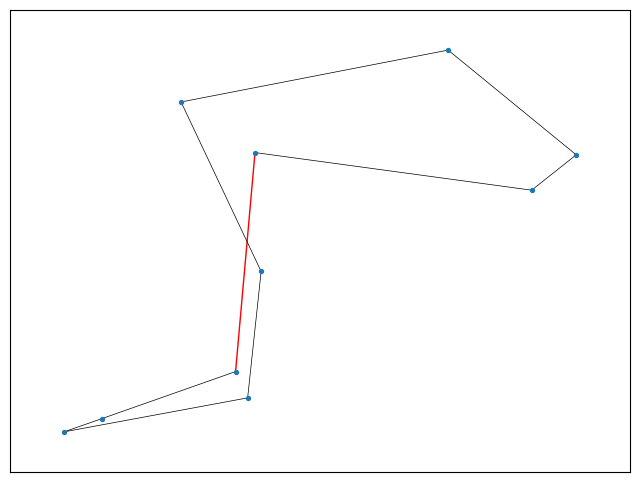

In [3]:
points = import_instance("10.json")
solver = BTSPSolverSAT(points, 2)
edges, time_taken = solver.solve(0)
print("Time taken: " + str(time_taken))
draw_edges(edges)

In [4]:
for i in range(5,16):
    export_instance(str(i)+".json",random_points(i))

# Benchmarks

In [5]:
def benchmark(points):
    solver = BTSPSolverSAT(points, 2)
    with suppress_stdout():
        edges, time_taken = solver.solve(0)
    print("Method: Binary Search; Time taken: " + str(time_taken))
    
    with suppress_stdout():
        edges, time_taken = solver.solve(1)
    print("Method: Linear Search Descending; Time taken: " + str(time_taken))
    
    with suppress_stdout():
        edges, time_taken = solver.solve(2)
    print("Method: Linear Search Ascending; Time taken: " + str(time_taken))

In [7]:
benchmark(import_instance("14.json"))

Method: Binary Search; Time taken: 5.2360269740000005
Method: Linear Search Descending; Time taken: 5.659052435000001
Method: Linear Search Ascending; Time taken: 5.660138594000004
